In [1]:
import pandas as pd
outcomes = pd.read_csv('Most-Recent-Cohorts-Field-of-Study.csv') # outcomes
financial_aid = pd.read_csv('sfa2122.csv') # Financial aid data 2022
institutions = pd.read_csv('hd2022.csv', encoding='cp1252') # institutions

merged_1 = pd.merge(financial_aid, institutions, on = 'UNITID')

merged_2 = pd.merge(merged_1, outcomes, on = 'UNITID')

merged_2 = merged_2[merged_2['CARNEGIE']>=0]

## Datasets

In [2]:
financial_aid.head()

,UNITID,XSCUGRAD,SCUGRAD,XSCUGDGSK,SCUGDGSK,XSCUGNDGS,SCUGNDGS,XSCUGFFN,SCUGFFN,XSCUGFFP,...,XNPT410,NPT410,XNPT420,NPT420,XNPT430,NPT430,XNPT440,NPT440,XNPT450,NPT450
0,100654,R,5107,R,5094,R,13,R,1417,R,...,A,NaN,A,NaN,A,NaN,A,NaN,A,NaN
1,100663,R,13547,R,13284,R,263,R,2361,R,...,A,NaN,A,NaN,A,NaN,A,NaN,A,NaN
2,100690,R,251,R,251,R,0,R,0,R,...,A,NaN,A,NaN,A,NaN,A,NaN,A,NaN
3,100706,R,7569,R,7360,R,209,R,1191,R,...,A,NaN,A,NaN,A,NaN,A,NaN,A,NaN
4,100724,R,3499,R,3495,R,4,R,797,R,...,A,NaN,A,NaN,A,NaN,A,NaN,A,NaN


(20.0, 55.0)

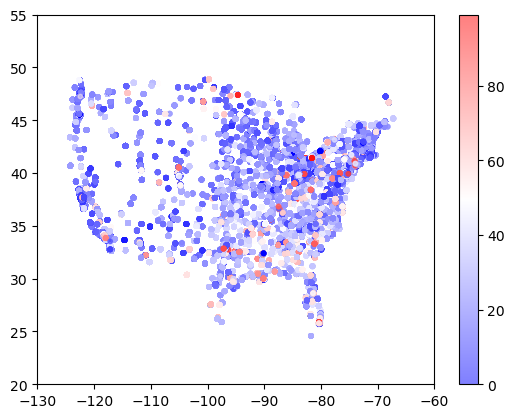

In [3]:
from matplotlib import pyplot as plt 
plt.scatter(merged_2['LONGITUD'], merged_2['LATITUDE'], c=merged_2['UPGRNTP'], \
            s=10, alpha=0.5, cmap='bwr')
plt.colorbar()
plt.xlim(-130, -60)
plt.ylim(20, 55)

Text(0, 0.5, 'Number of institutions')

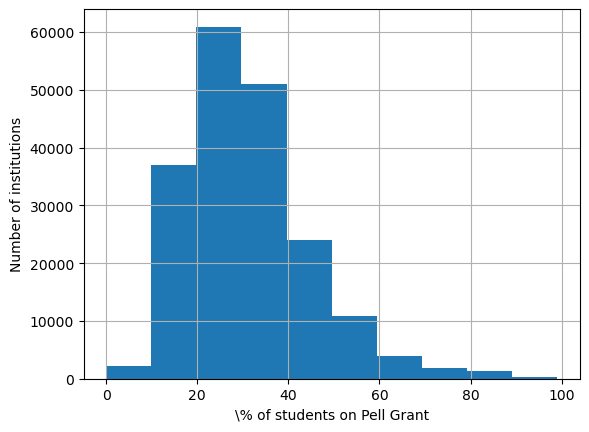

In [4]:
merged_2['UPGRNTP'].hist()
plt.xlabel('\% of students on Pell Grant')
plt.ylabel('Number of institutions')

In [5]:
outcomes.head()

,UNITID,OPEID6,INSTNM,CONTROL,MAIN,CIPCODE,CIPDESC,CREDLEV,CREDDESC,IPEDSCOUNT1,...,BBRR4_FED_COMP_N,BBRR4_FED_COMP_DFLT,BBRR4_FED_COMP_DLNQ,BBRR4_FED_COMP_FBR,BBRR4_FED_COMP_DFR,BBRR4_FED_COMP_NOPROG,BBRR4_FED_COMP_MAKEPROG,BBRR4_FED_COMP_PAIDINFULL,BBRR4_FED_COMP_DISCHARGE,DISTANCE
0,100654.0,1002,Alabama A & M University,Public,1,100,"Agriculture, General.",3,Bachelor's Degree,NaN,...,PS,PS,PS,PS,PS,PS,PS,PS,PS,0
1,100654.0,1002,Alabama A & M University,Public,1,101,Agricultural Business and Management.,3,Bachelor's Degree,NaN,...,PS,PS,PS,PS,PS,PS,PS,PS,PS,0
2,100654.0,1002,Alabama A & M University,Public,1,109,Animal Sciences.,3,Bachelor's Degree,6.0,...,PS,PS,PS,PS,PS,PS,PS,PS,PS,1
3,100654.0,1002,Alabama A & M University,Public,1,110,Food Science and Technology.,3,Bachelor's Degree,7.0,...,PS,PS,PS,PS,PS,PS,PS,PS,PS,1
4,100654.0,1002,Alabama A & M University,Public,1,110,Food Science and Technology.,5,Master's Degree,8.0,...,12,PS,PS,PS,PS,PS,PS,PS,PS,1


In [6]:
outcomes.columns

Index(['UNITID', 'OPEID6', 'INSTNM', 'CONTROL', 'MAIN', 'CIPCODE', 'CIPDESC',
       'CREDLEV', 'CREDDESC', 'IPEDSCOUNT1',
       ...
       'BBRR4_FED_COMP_N', 'BBRR4_FED_COMP_DFLT', 'BBRR4_FED_COMP_DLNQ',
       'BBRR4_FED_COMP_FBR', 'BBRR4_FED_COMP_DFR', 'BBRR4_FED_COMP_NOPROG',
       'BBRR4_FED_COMP_MAKEPROG', 'BBRR4_FED_COMP_PAIDINFULL',
       'BBRR4_FED_COMP_DISCHARGE', 'DISTANCE'],
      dtype='object', length=160)

In [7]:
merged_2[['CIPCODE', 'UNITID']]

,CIPCODE,UNITID
0,100,100654
1,101,100654
2,109,100654
3,110,100654
4,110,100654
...,...,...
213939,5213,490805
213940,5214,490805
213941,5299,490805
213942,5401,490805


## Plots By Comp Sci Major

In [8]:
condition = (merged_2['CIPCODE'] == 1101) | (merged_2['CIPCODE'] == 1104) | (merged_2['CIPCODE'] == 1110)
majors = merged_2[condition]
x_axis = majors['UPGRNTP']
y_axis = majors['EARN_PELL_WNE_MDN_4YR'].replace('PS', 0).astype(int)

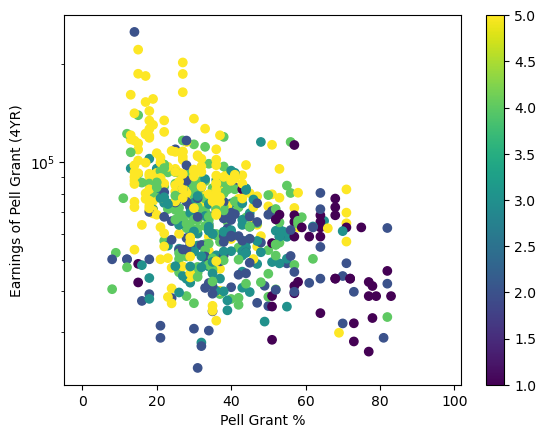

In [9]:
from matplotlib import pyplot as plt
plt.scatter(x_axis, y_axis, c = majors['INSTSIZE'])
plt.xlabel('Pell Grant %')
plt.ylabel('Earnings of Pell Grant (4YR)')
plt.yscale('log')
plt.colorbar()

In [74]:
condition = (merged_2['CIPCODE'] == 1101) | (merged_2['CIPCODE'] == 1104) | (merged_2['CIPCODE'] == 1110)
majors = merged_2[condition]
x_axis = majors['UPGRNTP']

y_axis = majors['EARN_PELL_NE_MDN_3YR'].replace('PS', 0).fillna(0).astype(int)

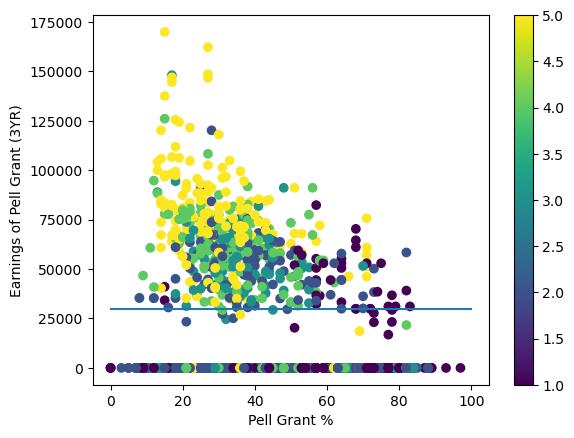

In [79]:
from matplotlib import pyplot as plt
plt.scatter(x_axis, y_axis, c = majors['INSTSIZE'])
plt.xlabel('Pell Grant %')
plt.ylabel('Earnings of Pell Grant (3YR)')
plt.plot((0, 100), (30000, 30000))
# plt.yscale('log')
plt.colorbar()

In [47]:
condition = (merged_2['CIPCODE'] == 1101) | (merged_2['CIPCODE'] == 1104) | (merged_2['CIPCODE'] == 1110)
majors = merged_2[condition]
x_axis = majors['UPGRNTP']
y_axis = majors['EARN_NE_MDN_3YR'].replace('PS', 0).fillna(0).astype(int)

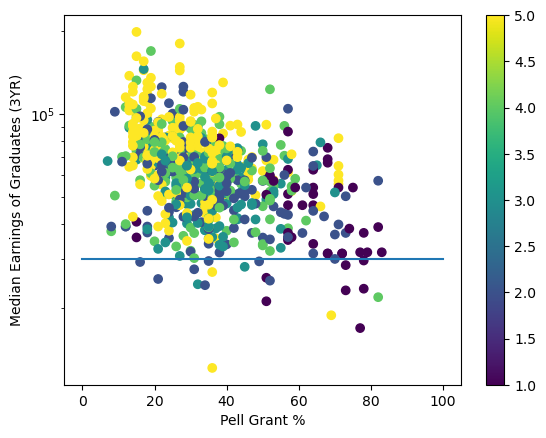

In [49]:
from matplotlib import pyplot as plt
plt.scatter(x_axis, y_axis, c = majors['INSTSIZE'])
plt.xlabel('Pell Grant %')
plt.ylabel('Median Earnings of Graduates (3YR)')
plt.plot((0, 100), (30000, 30000))
plt.yscale('log')
plt.colorbar()

In [26]:
condition = (merged_2['CIPCODE'] == 1101) | (merged_2['CIPCODE'] == 1104) | (merged_2['CIPCODE'] == 1110)
majors = merged_2[condition]
x_axis = majors['UPGRNTP']
y_axis = majors['EARN_MDN_4YR'].replace('PS', 0).fillna(0).astype(int)

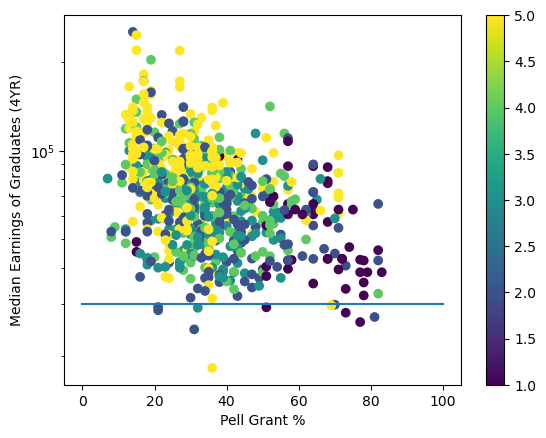

In [27]:
from matplotlib import pyplot as plt
plt.scatter(x_axis, y_axis, c = majors['INSTSIZE'])
plt.xlabel('Pell Grant %')
plt.ylabel('Median Earnings of Graduates (4YR)')
plt.plot((0, 100), (30000, 30000))
plt.yscale('log')
plt.colorbar()

In [28]:
condition = (merged_2['CIPCODE'] == 1101) | (merged_2['CIPCODE'] == 1104) | (merged_2['CIPCODE'] == 1110)
majors = merged_2[condition]
x_axis = majors['UPGRNTP']
y_axis = majors['EARN_MALE_NE_MDN_3YR'].replace('PS', 0).fillna(0).astype(int)

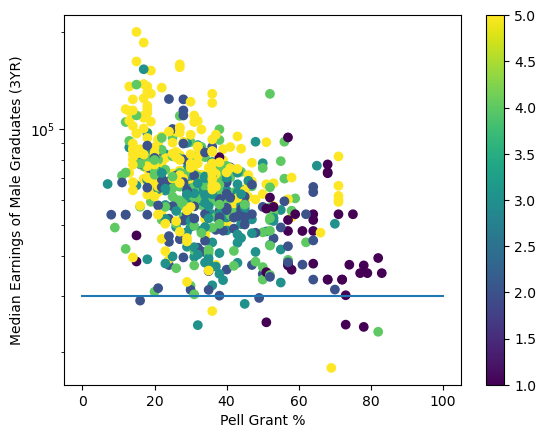

In [29]:
from matplotlib import pyplot as plt
plt.scatter(x_axis, y_axis, c = majors['INSTSIZE'])
plt.xlabel('Pell Grant %')
plt.ylabel('Median Earnings of Male Graduates (3YR)')
plt.plot((0, 100), (30000, 30000))
plt.yscale('log')
plt.colorbar()

In [52]:
condition = (merged_2['CIPCODE'] == 1101) | (merged_2['CIPCODE'] == 1104) | (merged_2['CIPCODE'] == 1110)
majors = merged_2[~condition]
x_axis = majors['UPGRNTP']
y_axis = majors['EARN_NOMALE_NE_MDN_3YR'].replace('PS', 0).fillna(0).astype(int)

In [63]:
tmp = pd.DataFrame()
tmp['earnings'] = merged_2['EARN_NOMALE_NE_MDN_3YR'].replace('PS', 0).fillna(0).astype(int)
tmp['pell_%'] = merged_2['UPGRNTP']
tmp['cs'] = condition

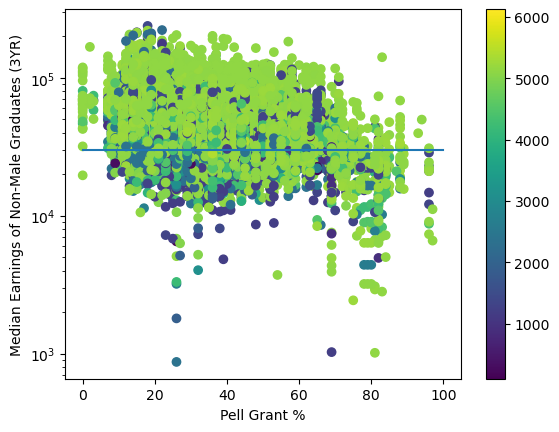

In [72]:
from matplotlib import pyplot as plt
plt.scatter(x_axis, y_axis, c = majors['CIPCODE'])
plt.xlabel('Pell Grant %')
plt.ylabel('Median Earnings of Non-Male Graduates (3YR)')
plt.plot((0, 100), (30000, 30000))
plt.yscale('log')
plt.colorbar()

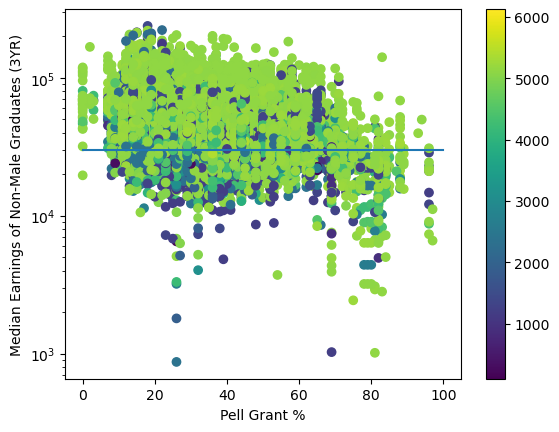

In [53]:
from matplotlib import pyplot as plt
plt.scatter(x_axis, y_axis, c = majors['CIPCODE'])
plt.xlabel('Pell Grant %')
plt.ylabel('Median Earnings of Non-Male Graduates (3YR)')
plt.plot((0, 100), (30000, 30000))
plt.yscale('log')
plt.colorbar()

In [32]:
condition = (merged_2['CIPCODE'] == 1101) | (merged_2['CIPCODE'] == 1104) | (merged_2['CIPCODE'] == 1110)
majors = merged_2[condition]
x_axis = majors['UPGRNTP']
y_axis = majors['EARN_NOMALE_WNE_MDN_4YR'].replace('PS', 0).fillna(0).astype(int)

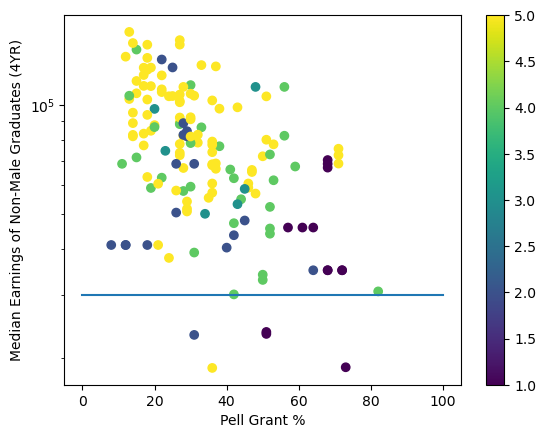

In [33]:
from matplotlib import pyplot as plt
plt.scatter(x_axis, y_axis, c = majors['INSTSIZE'])
plt.xlabel('Pell Grant %')
plt.ylabel('Median Earnings of Non-Male Graduates (4YR)')
plt.plot((0, 100), (30000, 30000))
plt.yscale('log')
plt.colorbar()

## Southeast Plots

In [43]:
condition = (merged_2['CIPCODE'] == 1101) | (merged_2['CIPCODE'] == 1104) | (merged_2['CIPCODE'] == 1110) & (merged_2['STABBR'].isin(['AL', 'AR', 'FL', 'GA', 'KY', 'LA', 'MS', 'NC', 'SC', 'TN', 'VA', 'WV']))
majors = merged_2[condition]
x_axis = majors['UPGRNTP']
y_axis = majors['EARN_PELL_WNE_MDN_4YR'].replace('PS', 0).astype(int)

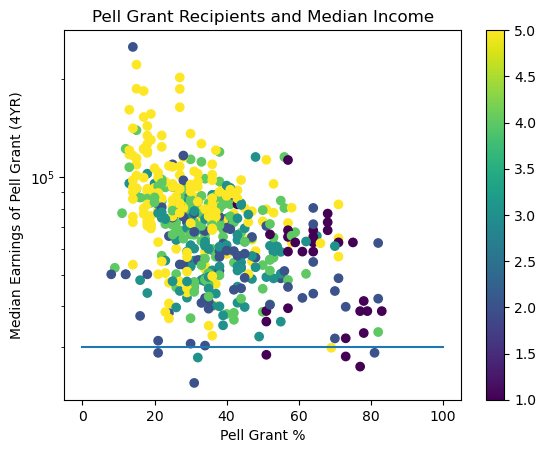

In [44]:
from matplotlib import pyplot as plt
plt.scatter(x_axis, y_axis, c = majors['INSTSIZE'])
plt.xlabel('Pell Grant %')
plt.ylabel('Median Earnings of Pell Grant (4YR)')
plt.title('Pell Grant Recipients and Median Income')
plt.plot((0, 100), (30000, 30000))
plt.yscale('log')
plt.colorbar()

In [45]:
condition = (merged_2['CIPCODE'] == 1101) | (merged_2['CIPCODE'] == 1104) | (merged_2['CIPCODE'] == 1110) & (merged_2['STABBR'].isin(['AL', 'AR', 'FL', 'GA', 'KY', 'LA', 'MS', 'NC', 'SC', 'TN', 'VA', 'WV']))
majors = merged_2[condition]
x_axis = majors['UPGRNTP']
y_axis = majors['EARN_PELL_NE_MDN_3YR'].replace('PS', 0).fillna(0).astype(int)

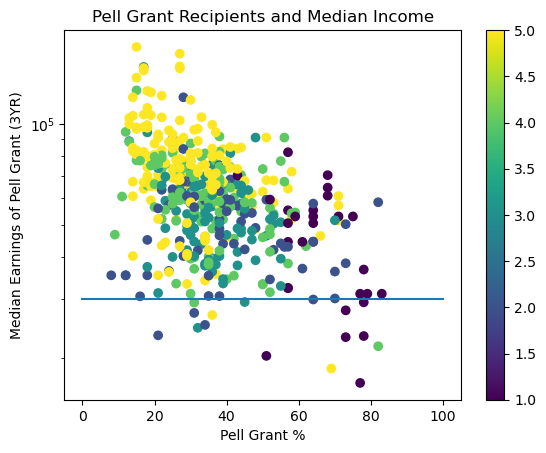

In [46]:
from matplotlib import pyplot as plt
plt.scatter(x_axis, y_axis, c = majors['INSTSIZE'])
plt.xlabel('Pell Grant %')
plt.ylabel('Median Earnings of Pell Grant (3YR)')
plt.title('Pell Grant Recipients and Median Income')
plt.plot((0, 100), (30000, 30000))
plt.yscale('log')
plt.colorbar()